In [1]:
from magnetic_field import *
from utils import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

exact_value = -8.56677223
bn_list = create_bn_list(7)

In [3]:
def run(method, nqubit, depth_list, bn_type=None, bn_range=None, bn_value=None):
    results = []
    for depth in depth_list:
        result = getResult(nqubit, depth, method, bn_type, bn_range, bn_value)
        if result == None:
            continue
#         print("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s" % (result["method"], result["depth"], result["bn_type"], result["bn_value"], result["cost"]["min"], result["cost"]["max"], result["cost"]["mean"], result["cost"]["std"], result["iter"]["min"], result["iter"]["max"], result["iter"]["mean"], result["iter"]["std"]))
        results.append(result)
    return results

In [4]:
vqe_results = []
nqubit = 7
method = 'indirect_ising'
depth_list = [16,20,24,28]
vqe_results.extend(run(method, nqubit, depth_list, 'static_random', 2, None))
for bn in bn_list:
    vqe_results.extend(run(method, nqubit, depth_list, 'static', None, bn))

method = 'indirect_xy'
depth_list = [12,16,20,24,28,32]
vqe_results.extend(run(method, nqubit, depth_list, 'static_random', 2, None))
for bn in bn_list:
    vqe_results.extend(run(method, nqubit, depth_list, 'static', None, bn))

method = 'indirect_xyz'
depth_list = [8,12,16,20,24,28]
vqe_results.extend(run(method, nqubit, depth_list, None, None, None))

In [5]:
for result in vqe_results:
        if result == None:
            continue
        print("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s" % (result["method"], result["depth"], result["bn_type"], result["bn_range"], result["bn_value"], result["cost"]["min"], result["cost"]["max"], result["cost"]["mean"], result["cost"]["std"], result["iter"]["min"], result["iter"]["max"], result["iter"]["mean"], result["iter"]["std"]))

indirect_ising,16,static_random,2,None,-7.287830337438277,6.0000000000001625,-5.757172360781831,1.4199556359781769,101.0,35092.0,9445.48,6210.143625521072
indirect_ising,20,static_random,2,None,-8.03340542665132,-1.502847681354614,-6.238902538036034,1.0760817234311928,314.0,46605.0,14136.13,9131.211051832062
indirect_ising,24,static_random,2,None,-8.318740232513381,-4.5377137218299435,-6.697317384924971,0.8836173644535855,5741.0,69575.0,21020.62,12658.475404076116
indirect_ising,28,static_random,2,None,-8.236665021323399,6.000000000000198,-6.682563315322366,1.6528735149699865,173.0,86125.0,27649.24,18748.941789402408
indirect_ising,16,static,None,-1.0,-6.63089462004592,-5.793305658500772,-6.127748821460973,0.2623556184076094,2342.0,8248.0,4639.2,1449.941157426742
indirect_ising,20,static,None,-1.0,-7.8496279134924665,-4.869054809534436,-6.935773718216952,0.9527427838951092,5515.0,12156.0,7741.7,1909.1862166902422
indirect_ising,24,static,None,-1.0,-8.005978587519097,-7.363389463996913,

In [6]:
plot_list = {}
for result in vqe_results:
    if result['bn_type'] == 'static_random':
        if ("%s-depth" % result['method']) not in plot_list.keys():
            plot_list["%s-depth" % result['method']] = [result['depth']]
            plot_list["%s-cost-min" % result['method']] = [result['cost']['min']]
            plot_list["%s-cost-mean" % result['method']] = [result['cost']['mean']]
        else:
            plot_list["%s-depth" % result['method']].append(result['depth'])
            plot_list["%s-cost-min" % result['method']].append(result['cost']['min'])
            plot_list["%s-cost-mean" % result['method']].append(result['cost']['mean'])
    elif result['method'] == 'indirect_xyz':
        if ("%s-depth" % result['method']) not in plot_list.keys():
            plot_list["%s-depth" % result['method']] = [result['depth']]
            plot_list["%s-cost-min" % result['method']] = [result['cost']['min']]
            plot_list["%s-cost-mean" % result['method']] = [result['cost']['mean']]
        else:
            plot_list["%s-depth" % result['method']].append(result['depth'])
            plot_list["%s-cost-min" % result['method']].append(result['cost']['min'])
            plot_list["%s-cost-mean" % result['method']].append(result['cost']['mean'])

def create_graph(title):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("expectation value")
    plt.ylim(-9.0, -5.0)

plot_list.keys()

dict_keys(['indirect_ising-depth', 'indirect_ising-cost-min', 'indirect_ising-cost-mean', 'indirect_xy-depth', 'indirect_xy-cost-min', 'indirect_xy-cost-mean', 'indirect_xyz-depth', 'indirect_xyz-cost-min', 'indirect_xyz-cost-mean'])

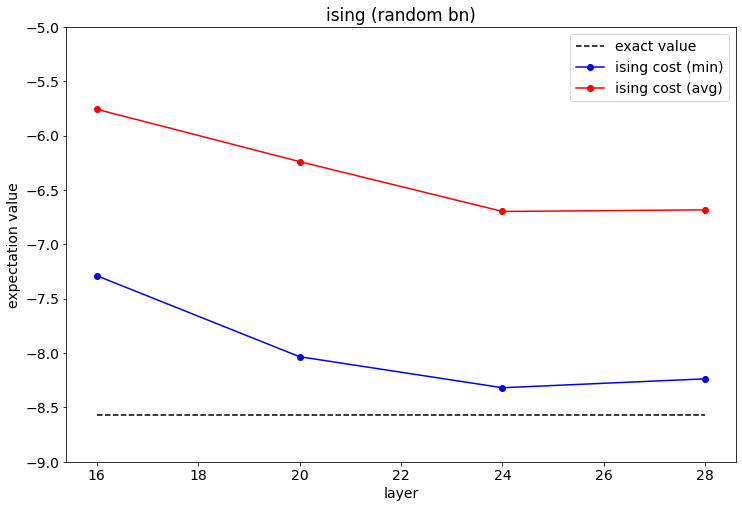

In [7]:
create_graph("ising (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_ising-depth']), max(plot_list['indirect_ising-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-cost-min'], marker='o', color='blue', label='ising cost (min)')
plt.plot(plot_list['indirect_ising-depth'], plot_list['indirect_ising-cost-mean'], marker='o', color='red', label='ising cost (avg)')
plt.legend()
plt.savefig('ising_random_bn.png')

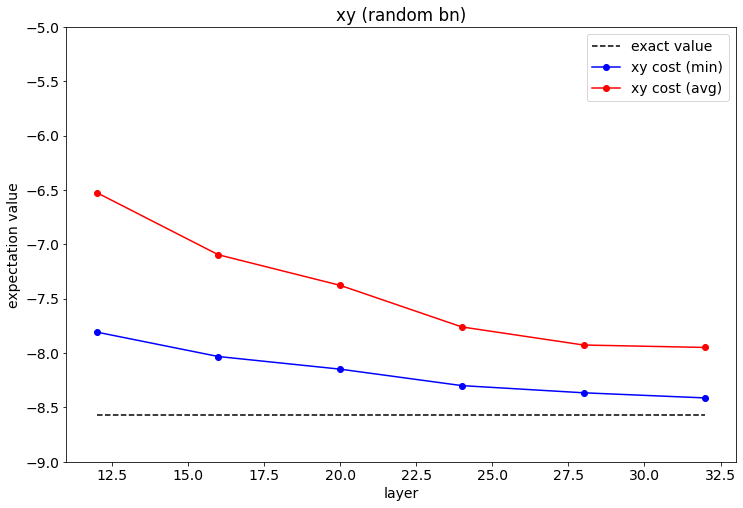

In [8]:
create_graph("xy (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_xy-depth']), max(plot_list['indirect_xy-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-cost-min'], marker='o', color='blue', label='xy cost (min)')
plt.plot(plot_list['indirect_xy-depth'], plot_list['indirect_xy-cost-mean'], marker='o', color='red', label='xy cost (avg)')
plt.legend()
plt.savefig('xy_random_bn.png')

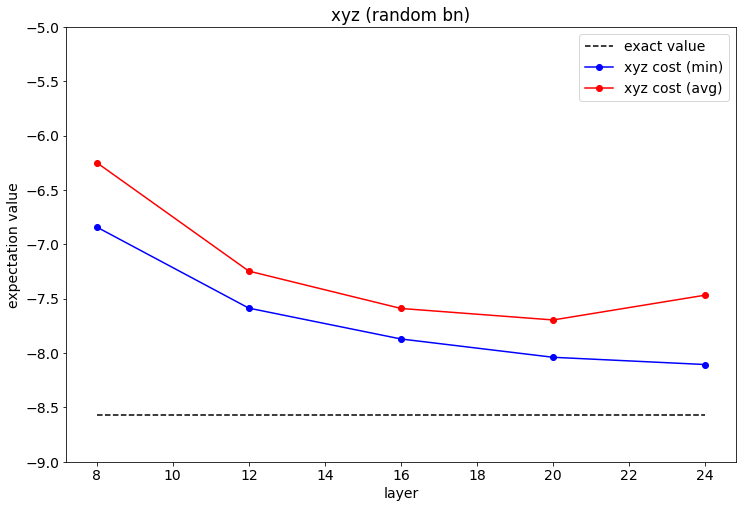

In [9]:
create_graph("xyz (random bn)")
plt.hlines(exact_value, min(plot_list['indirect_xyz-depth']), max(plot_list['indirect_xyz-depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-cost-min'], marker='o', color='blue', label='xyz cost (min)')
plt.plot(plot_list['indirect_xyz-depth'], plot_list['indirect_xyz-cost-mean'], marker='o', color='red', label='xyz cost (avg)')
plt.legend()
plt.savefig('xyz_random_bn.png')

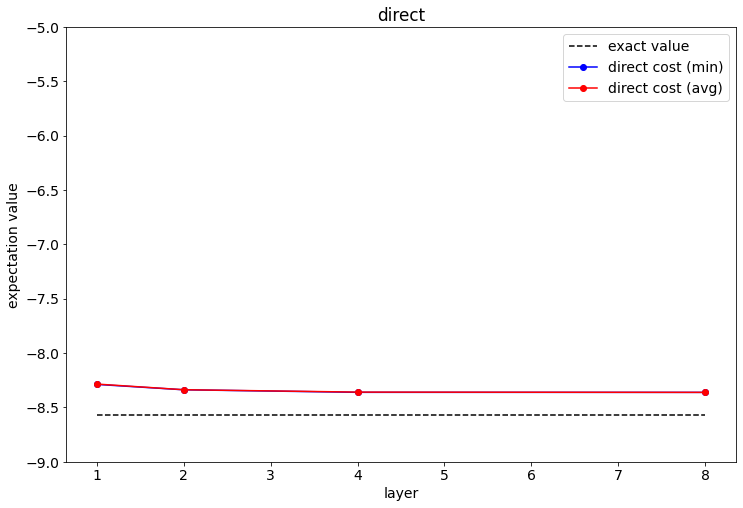

In [10]:
## 直接制御
method = 'direct'
depth_list = [1,2,4,8]
direct_results = run(method, nqubit, depth_list)

d_plot_list = {}

for result in direct_results:
    if 'depth' not in d_plot_list.keys():
        d_plot_list["depth"] = [result['depth']]
        d_plot_list["cost-min"] = [result['cost']['min']]
        d_plot_list["cost-mean"] = [result['cost']['mean']]
    else:
        d_plot_list["depth"].append(result['depth'])
        d_plot_list["cost-min"].append(result['cost']['min'])
        d_plot_list["cost-mean"].append(result['cost']['mean'])

create_graph("direct")
plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(d_plot_list['depth'], d_plot_list['cost-min'], marker='o', color='blue', label='direct cost (min)')
plt.plot(d_plot_list['depth'], d_plot_list['cost-mean'], marker='o', color='red', label='direct cost (avg)')
plt.legend()
plt.savefig('direct.png')

In [19]:
random_results = []
nqubit = 7

method = 'indirect_xy'
random_results.extend(run(method, nqubit, [16], 'static', None, create_bn(MagneticField.BN_01, 7)))
random_results.extend(run(method, nqubit, [16], 'static', None, create_bn(MagneticField.BN_05, 7)))
random_results.extend(run(method, nqubit, [16], 'static', None, create_bn(MagneticField.BN_MINUS_08, 7)))
random_results.extend(run(method, nqubit, [20], 'static_random', 2, None))
random_results.extend(run(method, nqubit, [20], 'static_random', 4, None))
random_results.extend(run(method, nqubit, [20], 'static_random', 6, None))
random_results.extend(run(method, nqubit, [20], 'static_random', 8, None))
random_results

[{'method': 'indirect_xy',
  'depth': 16,
  'bn_type': 'static',
  'bn_range': None,
  'bn_value': '0.09999999999999964',
  'cost': {'min': -7.3900813008357,
   'max': -5.942069739975954,
   'mean': -6.527283333937206,
   'std': 0.46528997330666066},
  'iter': {'min': 8758.0,
   'max': 14662.0,
   'mean': 11843.8,
   'std': 2088.4036391464174}},
 {'method': 'indirect_xy',
  'depth': 16,
  'bn_type': 'static',
  'bn_range': None,
  'bn_value': '0.49999999999999956',
  'cost': {'min': -7.527404173652685,
   'max': -6.113965690424754,
   'mean': -6.654188624137499,
   'std': 0.4523480911503353},
  'iter': {'min': 7360.0,
   'max': 19594.0,
   'mean': 12560.4,
   'std': 4334.1981311426}},
 {'method': 'indirect_xy',
  'depth': 16,
  'bn_type': 'static',
  'bn_range': None,
  'bn_value': '-0.8',
  'cost': {'min': -7.722361744084365,
   'max': -6.239460381440431,
   'mean': -6.750988084754605,
   'std': 0.44128574570575585},
  'iter': {'min': 8276.0,
   'max': 24706.0,
   'mean': 15384.2,
   